In [1]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mglearn

data = pd.read_csv('../ssd_data/combined_by_diskmodel/combined_MB1.csv',index_col=False)

# 데이터를 시간 순서대로 정렬 ('ds' 컬럼을 기준으로)
data = data.sort_values(by=['ds'])
data = data.drop_duplicates(subset=['disk_id', 'ds'])
data.reset_index(inplace=True)
del(data['index'])
data

,level_0,disk_id,ds,model,n_1,r_1,n_5,r_5,n_9,r_9,...,r_244,n_245,r_245,n_175,r_175,n_232,r_232,label,n_211,r_211
0,0,10005,20190101,MB1,NaN,NaN,100.0,0.0,99.0,4600.0,...,0.0,100.0,65535.0,NaN,NaN,NaN,NaN,0,NaN,NaN
1,25641,39138,20190101,MB1,NaN,NaN,100.0,0.0,97.0,13256.0,...,0.0,100.0,65535.0,NaN,NaN,NaN,NaN,0,NaN,NaN
2,25642,3918,20190101,MB1,NaN,NaN,100.0,0.0,97.0,13305.0,...,0.0,100.0,65535.0,NaN,NaN,NaN,NaN,0,NaN,NaN
3,25643,39187,20190101,MB1,NaN,NaN,100.0,0.0,97.0,12934.0,...,0.0,100.0,65535.0,NaN,NaN,NaN,NaN,0,NaN,NaN
4,25644,39189,20190101,MB1,NaN,NaN,100.0,0.0,97.0,12934.0,...,0.0,100.0,65535.0,NaN,NaN,NaN,NaN,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7132648,7106047,27627,20190630,MB1,NaN,NaN,100.0,0.0,96.0,17027.0,...,0.0,100.0,65535.0,NaN,NaN,NaN,NaN,0,NaN,NaN
7132649,7106048,27631,20190630,MB1,NaN,NaN,100.0,0.0,96.0,17027.0,...,0.0,100.0,65535.0,NaN,NaN,NaN,NaN,0,NaN,NaN
7132650,7106049,27676,20190630,MB1,NaN,NaN,100.0,0.0,96.0,18069.0,...,0.0,100.0,65535.0,NaN,NaN,NaN,NaN,0,NaN,NaN
7132651,7106042,27586,20190630,MB1,NaN,NaN,100.0,0.0,98.0,8476.0,...,0.0,100.0,65535.0,NaN,NaN,NaN,NaN,0,NaN,NaN


In [2]:
del(data['level_0'])

In [3]:
# null값이 있는 열을 제거하는 코드
def remove_null_columns(df):
    # null인 컬럼을 확인하고, 모든 값이 null인 컬럼을 찾습니다.
    null_columns = df.columns[df.isnull().all()]
    
    # 모든 값이 null인 컬럼을 DataFrame에서 제거합니다.
    df = df.drop(null_columns, axis=1)
    
    return df
# 하나의 unique한 값으로만 이루어진 컬럼을 제거하는 코드
def remove_single_value_columns(df):
    single_value_cols = []
    for col in df.columns:
        unique_values = df[col].nunique()
        if unique_values == 1:
            single_value_cols.append(col)

    df_filtered = df.drop(single_value_cols, axis=1)
    return df_filtered


In [4]:
data = remove_null_columns(data)
data = remove_single_value_columns(data)

In [10]:
selected_disk_ids = data[data['label']==1]['disk_id'].unique()

dfs_to_concat = []  # 추가할 데이터프레임들을 저장할 리스트

for disk_id in selected_disk_ids:
    disk_data = data[data['disk_id'] == disk_id].copy()
    disk_data['ds'] = pd.to_datetime(disk_data['ds'], format='%Y%m%d')
    disk_data = disk_data.sort_values(by='ds')
    disk_data = disk_data.set_index('ds', drop=True)
    all_dates = pd.date_range(start=disk_data.index.min(), end=disk_data.index.max(), freq='D')
    disk_data = disk_data.reindex(all_dates)
    disk_data = disk_data.interpolate(method='linear')
    dfs_to_concat.append(disk_data)

interpolated_data = pd.concat(dfs_to_concat)  # 데이터프레임들을 연결하여 새로운 데이터프레임 생성

interpolated_data = interpolated_data.reset_index()  # 인덱스 재설정
interpolated_data

,index,disk_id,n_5,r_5,n_9,r_9,n_12,r_12,n_177,r_177,...,r_194,n_195,r_195,n_199,r_199,n_241,r_241,n_242,r_242,label
0,2019-01-01,17909.0,99.0,2.0,97.0,12819.0,99.0,19.0,97.0,155.0,...,32.0,199.0,1.0,100.0,0.0,99.0,4.761304e+11,99.0,3.422788e+11,1.0
1,2019-01-02,17909.0,99.0,2.0,97.0,12843.0,99.0,19.0,97.0,155.0,...,31.0,199.0,1.0,100.0,0.0,99.0,4.774871e+11,99.0,3.432220e+11,0.0
2,2019-01-03,17909.0,99.0,2.0,97.0,12867.0,99.0,19.0,97.0,156.0,...,31.0,199.0,1.0,100.0,0.0,99.0,4.790559e+11,99.0,3.467700e+11,0.0
3,2019-01-04,17909.0,99.0,2.0,97.0,12891.0,99.0,19.0,97.0,156.0,...,32.0,199.0,1.0,100.0,0.0,99.0,4.805626e+11,99.0,3.477830e+11,0.0
4,2019-01-05,17909.0,99.0,2.0,97.0,12915.0,99.0,19.0,97.0,157.0,...,31.0,199.0,1.0,100.0,0.0,99.0,4.819720e+11,99.0,3.512526e+11,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43895,2019-06-26,8599.0,100.0,0.0,96.0,17168.0,99.0,21.0,91.0,623.0,...,30.0,200.0,0.0,100.0,0.0,99.0,2.201000e+12,99.0,8.356453e+11,0.0
43896,2019-06-27,8599.0,100.0,0.0,96.0,17192.0,99.0,21.0,91.0,623.0,...,30.0,200.0,0.0,100.0,0.0,99.0,2.201312e+12,99.0,8.362658e+11,0.0
43897,2019-06-28,8599.0,100.0,0.0,96.0,17216.0,99.0,21.0,91.0,624.0,...,31.0,200.0,0.0,100.0,0.0,99.0,2.201585e+12,99.0,8.371074e+11,0.0
43898,2019-06-29,8599.0,99.0,2.0,96.0,17240.0,99.0,21.0,91.0,624.0,...,30.0,200.0,0.0,100.0,0.0,99.0,2.201871e+12,99.0,8.379656e+11,0.0


In [13]:
selected_disk_model_1 = interpolated_data['disk_id'].unique()

to_delete_id =[]
for disk_id in selected_disk_model_1:
    disk_data = interpolated_data[interpolated_data['disk_id'] == disk_id].copy()
    disk_data = disk_data.sort_values(by='index')
    disk_data.reset_index(inplace=True,drop=True)

    failed_index = disk_data[disk_data['label']==1]['index'].index.min()
    start_index = disk_data.index.min()

    if(failed_index - start_index) < 30:
        to_delete_id.append(disk_id)

# failed_disk_index에 해당하는 행들을 제거
data = interpolated_data[~interpolated_data['disk_id'].isin(to_delete_id)]
data

,index,disk_id,n_5,r_5,n_9,r_9,n_12,r_12,n_177,r_177,...,r_194,n_195,r_195,n_199,r_199,n_241,r_241,n_242,r_242,label
4148,2019-01-01,41400.0,100.0,0.0,97.0,12694.0,99.0,13.0,99.0,55.0,...,31.0,200.0,0.0,100.0,0.0,99.0,1.812450e+11,99.0,1.329623e+11,0.0
4149,2019-01-02,41400.0,100.0,0.0,97.0,12718.0,99.0,13.0,99.0,55.0,...,31.0,200.0,0.0,100.0,0.0,99.0,1.813687e+11,99.0,1.333035e+11,0.0
4150,2019-01-03,41400.0,100.0,0.0,97.0,12742.0,99.0,13.0,99.0,56.0,...,31.0,200.0,0.0,100.0,0.0,99.0,1.815201e+11,99.0,1.336394e+11,0.0
4151,2019-01-04,41400.0,100.0,0.0,97.0,12766.0,99.0,13.0,99.0,56.0,...,31.0,200.0,0.0,100.0,0.0,99.0,1.816743e+11,99.0,1.339799e+11,0.0
4152,2019-01-05,41400.0,100.0,0.0,97.0,12790.0,99.0,13.0,99.0,56.0,...,31.0,200.0,0.0,100.0,0.0,99.0,1.818216e+11,99.0,1.343434e+11,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43895,2019-06-26,8599.0,100.0,0.0,96.0,17168.0,99.0,21.0,91.0,623.0,...,30.0,200.0,0.0,100.0,0.0,99.0,2.201000e+12,99.0,8.356453e+11,0.0
43896,2019-06-27,8599.0,100.0,0.0,96.0,17192.0,99.0,21.0,91.0,623.0,...,30.0,200.0,0.0,100.0,0.0,99.0,2.201312e+12,99.0,8.362658e+11,0.0
43897,2019-06-28,8599.0,100.0,0.0,96.0,17216.0,99.0,21.0,91.0,624.0,...,31.0,200.0,0.0,100.0,0.0,99.0,2.201585e+12,99.0,8.371074e+11,0.0
43898,2019-06-29,8599.0,99.0,2.0,96.0,17240.0,99.0,21.0,91.0,624.0,...,30.0,200.0,0.0,100.0,0.0,99.0,2.201871e+12,99.0,8.379656e+11,0.0


In [15]:
# 라벨이 1인 행을 필터링합니다.
selected_disk_model_1 = data[data['label'] == 1]

# 모델, disk_id, 그리고 날짜 순으로 정렬합니다.
selected_disk_model_1 = selected_disk_model_1.sort_values(by=['disk_id', 'index'])

# disk_id와 model 열만을 선택하여 새로운 데이터 프레임에 저장합니다.
selected_disk_model_1 = selected_disk_model_1[['disk_id']].drop_duplicates().reset_index(drop=True)

# 결과 데이터 프레임을 출력합니다.
selected_disk_model_1.shape

(242, 1)

In [92]:
to_cluster_data = pd.DataFrame()

for disk_id in selected_disk_model_1['disk_id'].unique():
    disk_data = data[data['disk_id'] == disk_id].copy()
    disk_data = disk_data.sort_values(by='index')
    disk_data.reset_index(inplace=True,drop=True)

    failed_index = disk_data[disk_data['label']==1]['index'].index.min()
    before_9day_index = failed_index - 9

    to_cluster = disk_data.iloc[before_9day_index:failed_index+1, :]
    to_cluster_data = pd.concat([to_cluster_data,to_cluster],axis=0)
    
to_cluster_data

,index,disk_id,n_5,r_5,n_9,r_9,n_12,r_12,n_177,r_177,...,r_194,n_195,r_195,n_199,r_199,n_241,r_241,n_242,r_242,label
74,2019-03-16,470.0,99.0,4.0,96.0,16054.0,99.0,18.0,99.0,7.0,...,29.0,200.0,0.0,100.0,0.0,99.0,1.383236e+10,99.0,8.743607e+09,0.0
75,2019-03-17,470.0,99.0,4.0,96.0,16078.0,99.0,18.0,99.0,7.0,...,29.0,200.0,0.0,100.0,0.0,99.0,1.383236e+10,99.0,8.744597e+09,0.0
76,2019-03-18,470.0,99.0,4.0,96.0,16102.0,99.0,18.0,99.0,7.0,...,29.0,200.0,0.0,100.0,0.0,99.0,1.383236e+10,99.0,8.745809e+09,0.0
77,2019-03-19,470.0,99.0,4.0,96.0,16126.0,99.0,18.0,99.0,7.0,...,29.0,200.0,0.0,100.0,0.0,99.0,1.383236e+10,99.0,8.747037e+09,0.0
78,2019-03-20,470.0,99.0,4.0,96.0,16150.0,99.0,18.0,99.0,7.0,...,29.0,200.0,0.0,100.0,0.0,99.0,1.383236e+10,99.0,8.748307e+09,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,2019-03-21,44338.0,99.0,2.0,96.0,16176.0,99.0,21.0,99.0,6.0,...,31.0,200.0,0.0,100.0,0.0,99.0,1.352326e+10,99.0,8.778025e+09,0.0
80,2019-03-22,44338.0,99.0,2.0,96.0,16200.0,99.0,21.0,99.0,6.0,...,31.0,200.0,0.0,100.0,0.0,99.0,1.352326e+10,99.0,8.779657e+09,0.0
81,2019-03-23,44338.0,99.0,2.0,96.0,16224.0,99.0,21.0,99.0,6.0,...,31.0,200.0,0.0,100.0,0.0,99.0,1.352326e+10,99.0,8.781085e+09,0.0
82,2019-03-24,44338.0,99.0,2.0,96.0,16248.0,99.0,21.0,99.0,6.0,...,31.0,200.0,0.0,100.0,0.0,99.0,1.352326e+10,99.0,8.782419e+09,0.0


In [93]:
to_cluster_data[to_cluster_data['disk_id']==470]

,index,disk_id,n_5,r_5,n_9,r_9,n_12,r_12,n_177,r_177,...,r_194,n_195,r_195,n_199,r_199,n_241,r_241,n_242,r_242,label
74,2019-03-16,470.0,99.0,4.0,96.0,16054.0,99.0,18.0,99.0,7.0,...,29.0,200.0,0.0,100.0,0.0,99.0,1.383236e+10,99.0,8.743607e+09,0.0
75,2019-03-17,470.0,99.0,4.0,96.0,16078.0,99.0,18.0,99.0,7.0,...,29.0,200.0,0.0,100.0,0.0,99.0,1.383236e+10,99.0,8.744597e+09,0.0
76,2019-03-18,470.0,99.0,4.0,96.0,16102.0,99.0,18.0,99.0,7.0,...,29.0,200.0,0.0,100.0,0.0,99.0,1.383236e+10,99.0,8.745809e+09,0.0
77,2019-03-19,470.0,99.0,4.0,96.0,16126.0,99.0,18.0,99.0,7.0,...,29.0,200.0,0.0,100.0,0.0,99.0,1.383236e+10,99.0,8.747037e+09,0.0
78,2019-03-20,470.0,99.0,4.0,96.0,16150.0,99.0,18.0,99.0,7.0,...,29.0,200.0,0.0,100.0,0.0,99.0,1.383236e+10,99.0,8.748307e+09,0.0
79,2019-03-21,470.0,99.0,4.0,96.0,16174.0,99.0,18.0,99.0,7.0,...,29.0,200.0,0.0,100.0,0.0,99.0,1.383236e+10,99.0,8.749580e+09,0.0
80,2019-03-22,470.0,99.0,4.0,96.0,16198.0,99.0,18.0,99.0,7.0,...,29.0,200.0,0.0,100.0,0.0,99.0,1.383236e+10,99.0,8.750794e+09,0.0
81,2019-03-23,470.0,99.0,4.0,96.0,16222.0,99.0,18.0,99.0,7.0,...,29.0,200.0,0.0,100.0,0.0,99.0,1.383236e+10,99.0,8.751875e+09,0.0
82,2019-03-24,470.0,99.0,4.0,96.0,16246.0,99.0,18.0,99.0,7.0,...,29.0,200.0,0.0,100.0,0.0,99.0,1.383236e+10,99.0,8.752874e+09,0.0
83,2019-03-25,470.0,99.0,4.0,96.0,16270.0,99.0,18.0,99.0,7.0,...,29.0,200.0,0.0,100.0,0.0,99.0,1.383236e+10,99.0,8.754062e+09,1.0


In [94]:
#Scaling 과정
from sklearn.preprocessing import MinMaxScaler

feature_data = to_cluster_data.sort_values(by=["disk_id", "index"]).drop(columns=['index','disk_id','label'])

scaler = MinMaxScaler()
sclaed_feature_data = scaler.fit_transform(feature_data)

# Assuming 'X_train' is the original DataFrame before scaling and its columns are to be preserved
scaled_cluster_df = pd.DataFrame(sclaed_feature_data, columns=feature_data.columns, index=feature_data.index)
to_cluster_df = pd.concat([to_cluster_data.sort_values(by=["disk_id", "index"])[['index','disk_id','label']],scaled_cluster_df], axis=1)

to_cluster = to_cluster_df.drop(columns=['index','label'])

grouped = to_cluster.groupby("disk_id").apply(np.array)

to_cluster = np.array(grouped.tolist())  # This is now a 3D array (n_samples, n_timestamps, n_features)
to_cluster.shape

(242, 10, 33)

In [95]:
from tslearn.clustering import TimeSeriesKMeans
from tslearn.preprocessing import TimeSeriesScalerMeanVariance

# Scale the data
scaler = TimeSeriesScalerMeanVariance()
data_scaled = scaler.fit_transform(to_cluster)

# Choose the number of clusters (k) you want
k = 4

# Run the TimeSeriesKMeans algorithm with DTW distance
km_dtw = TimeSeriesKMeans(n_clusters=k, metric="dtw")
clusters = km_dtw.fit_predict(data_scaled)

In [96]:
clusters

array([2, 2, 0, 0, 1, 0, 1, 0, 2, 1, 0, 1, 1, 0, 2, 2, 2, 1, 2, 2, 3, 3,
       2, 2, 2, 1, 3, 0, 1, 1, 1, 0, 0, 1, 0, 2, 2, 2, 0, 0, 2, 0, 0, 0,
       1, 1, 2, 1, 1, 0, 2, 2, 0, 2, 3, 0, 1, 2, 1, 3, 3, 1, 1, 1, 1, 1,
       1, 2, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 2, 1, 1, 1, 1, 0, 1, 2, 2,
       3, 0, 0, 0, 3, 2, 0, 1, 3, 3, 0, 1, 0, 0, 1, 1, 1, 3, 0, 1, 1, 2,
       0, 2, 2, 2, 2, 0, 1, 1, 3, 2, 2, 2, 3, 0, 3, 2, 2, 1, 0, 0, 2, 1,
       0, 1, 2, 1, 0, 2, 2, 2, 1, 1, 0, 0, 1, 0, 0, 1, 2, 2, 2, 2, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 3, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 2,
       1, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 0, 1, 2, 1, 3, 3, 2, 1, 2,
       3, 1, 1, 1, 1, 2, 2, 2, 1, 3, 2, 2, 0, 0, 2, 2, 1, 0, 1, 1, 1, 2,
       3, 1, 1, 1, 1, 2, 2, 0, 2, 2, 0, 2, 3, 2, 2, 1, 0, 0, 2, 0, 2, 2],
      dtype=int64)

In [97]:
to_cluster_df.reset_index(inplace=True,drop=True)

to_cluster_df['cluster']=0
for i, cluster in enumerate(clusters):
    to_cluster_df.loc[i*10:i*10+10, 'cluster'] = cluster
to_cluster_df

,index,disk_id,label,n_5,r_5,n_9,r_9,n_12,r_12,n_177,...,r_194,n_195,r_195,n_199,r_199,n_241,r_241,n_242,r_242,cluster
0,2019-03-16,470.0,0.0,0.979592,0.001253,0.0,0.705697,0.0,0.122951,0.909091,...,0.352941,1.0,0.0,1.0,0.0,1.0,0.004514,1.0,0.002353,2
1,2019-03-17,470.0,0.0,0.979592,0.001253,0.0,0.707496,0.0,0.122951,0.909091,...,0.352941,1.0,0.0,1.0,0.0,1.0,0.004514,1.0,0.002353,2
2,2019-03-18,470.0,0.0,0.979592,0.001253,0.0,0.709295,0.0,0.122951,0.909091,...,0.352941,1.0,0.0,1.0,0.0,1.0,0.004514,1.0,0.002353,2
3,2019-03-19,470.0,0.0,0.979592,0.001253,0.0,0.711094,0.0,0.122951,0.909091,...,0.352941,1.0,0.0,1.0,0.0,1.0,0.004514,1.0,0.002354,2
4,2019-03-20,470.0,0.0,0.979592,0.001253,0.0,0.712894,0.0,0.122951,0.909091,...,0.352941,1.0,0.0,1.0,0.0,1.0,0.004514,1.0,0.002354,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2415,2019-03-21,44338.0,0.0,0.979592,0.000627,0.0,0.714843,0.0,0.147541,0.909091,...,0.470588,1.0,0.0,1.0,0.0,1.0,0.004406,1.0,0.002363,2
2416,2019-03-22,44338.0,0.0,0.979592,0.000627,0.0,0.716642,0.0,0.147541,0.909091,...,0.470588,1.0,0.0,1.0,0.0,1.0,0.004406,1.0,0.002363,2
2417,2019-03-23,44338.0,0.0,0.979592,0.000627,0.0,0.718441,0.0,0.147541,0.909091,...,0.470588,1.0,0.0,1.0,0.0,1.0,0.004406,1.0,0.002363,2
2418,2019-03-24,44338.0,0.0,0.979592,0.000627,0.0,0.720240,0.0,0.147541,0.909091,...,0.470588,1.0,0.0,1.0,0.0,1.0,0.004406,1.0,0.002364,2


In [116]:
df = to_cluster_df.drop(columns=['index','label'])

cluster_0 = df[df['cluster']==0].drop('cluster',axis=1).copy()
cluster_1 = df[df['cluster']==1].drop('cluster',axis=1).copy()
cluster_2 = df[df['cluster']==2].drop('cluster',axis=1).copy()
cluster_3 = df[df['cluster']==3].drop('cluster',axis=1).copy()

cluster_0_grouped = cluster_0.groupby(['disk_id']).apply(np.array)
cluster_1_grouped = cluster_1.groupby(['disk_id']).apply(np.array)
cluster_2_grouped = cluster_2.groupby(['disk_id']).apply(np.array)
cluster_3_grouped = cluster_3.groupby(['disk_id']).apply(np.array)

cluster_0_arr = np.array(cluster_0_grouped.tolist())  # This is now a 3D groupby (n_samples, n_timestamps, n_features)
cluster_1_arr = np.array(cluster_1_grouped.tolist())
cluster_2_arr = np.array(cluster_2_grouped.tolist())
cluster_3_arr = np.array(cluster_3_grouped.tolist())

print('cluster_0_arr 의 shpae:',cluster_0_arr.shape)
print('cluster_1_arr 의 shpae:',cluster_1_arr.shape)
print('cluster_2_arr 의 shpae:',cluster_2_arr.shape)
print('cluster_3_arr 의 shpae:',cluster_3_arr.shape)

cluster_0_arr 의 shpae: (63, 10, 33)
cluster_1_arr 의 shpae: (82, 10, 33)
cluster_2_arr 의 shpae: (76, 10, 33)
cluster_3_arr 의 shpae: (21, 10, 33)


In [117]:
import numpy as np

# Calculate the mean along the first axis
cluster_0_mean_data = np.mean(cluster_0_arr, axis=0)
cluster_1_mean_data = np.mean(cluster_1_arr, axis=0)
cluster_2_mean_data = np.mean(cluster_2_arr, axis=0)
cluster_3_mean_data = np.mean(cluster_3_arr, axis=0)

# Now 'mean_data' has shape (10, 33)
print(cluster_0_mean_data.shape)  # Output: (10, 33)

(10, 33)


In [122]:
cluster_0_mean_df = pd.DataFrame(cluster_0_mean_data, columns=cluster_0.columns)
del(cluster_0_mean_df['disk_id'])

cluster_1_mean_df = pd.DataFrame(cluster_1_mean_data, columns=cluster_1.columns)
del(cluster_1_mean_df['disk_id'])

cluster_2_mean_df = pd.DataFrame(cluster_2_mean_data, columns=cluster_2.columns)
del(cluster_2_mean_df['disk_id'])

cluster_3_mean_df = pd.DataFrame(cluster_3_mean_data, columns=cluster_3.columns)
del(cluster_3_mean_df['disk_id'])

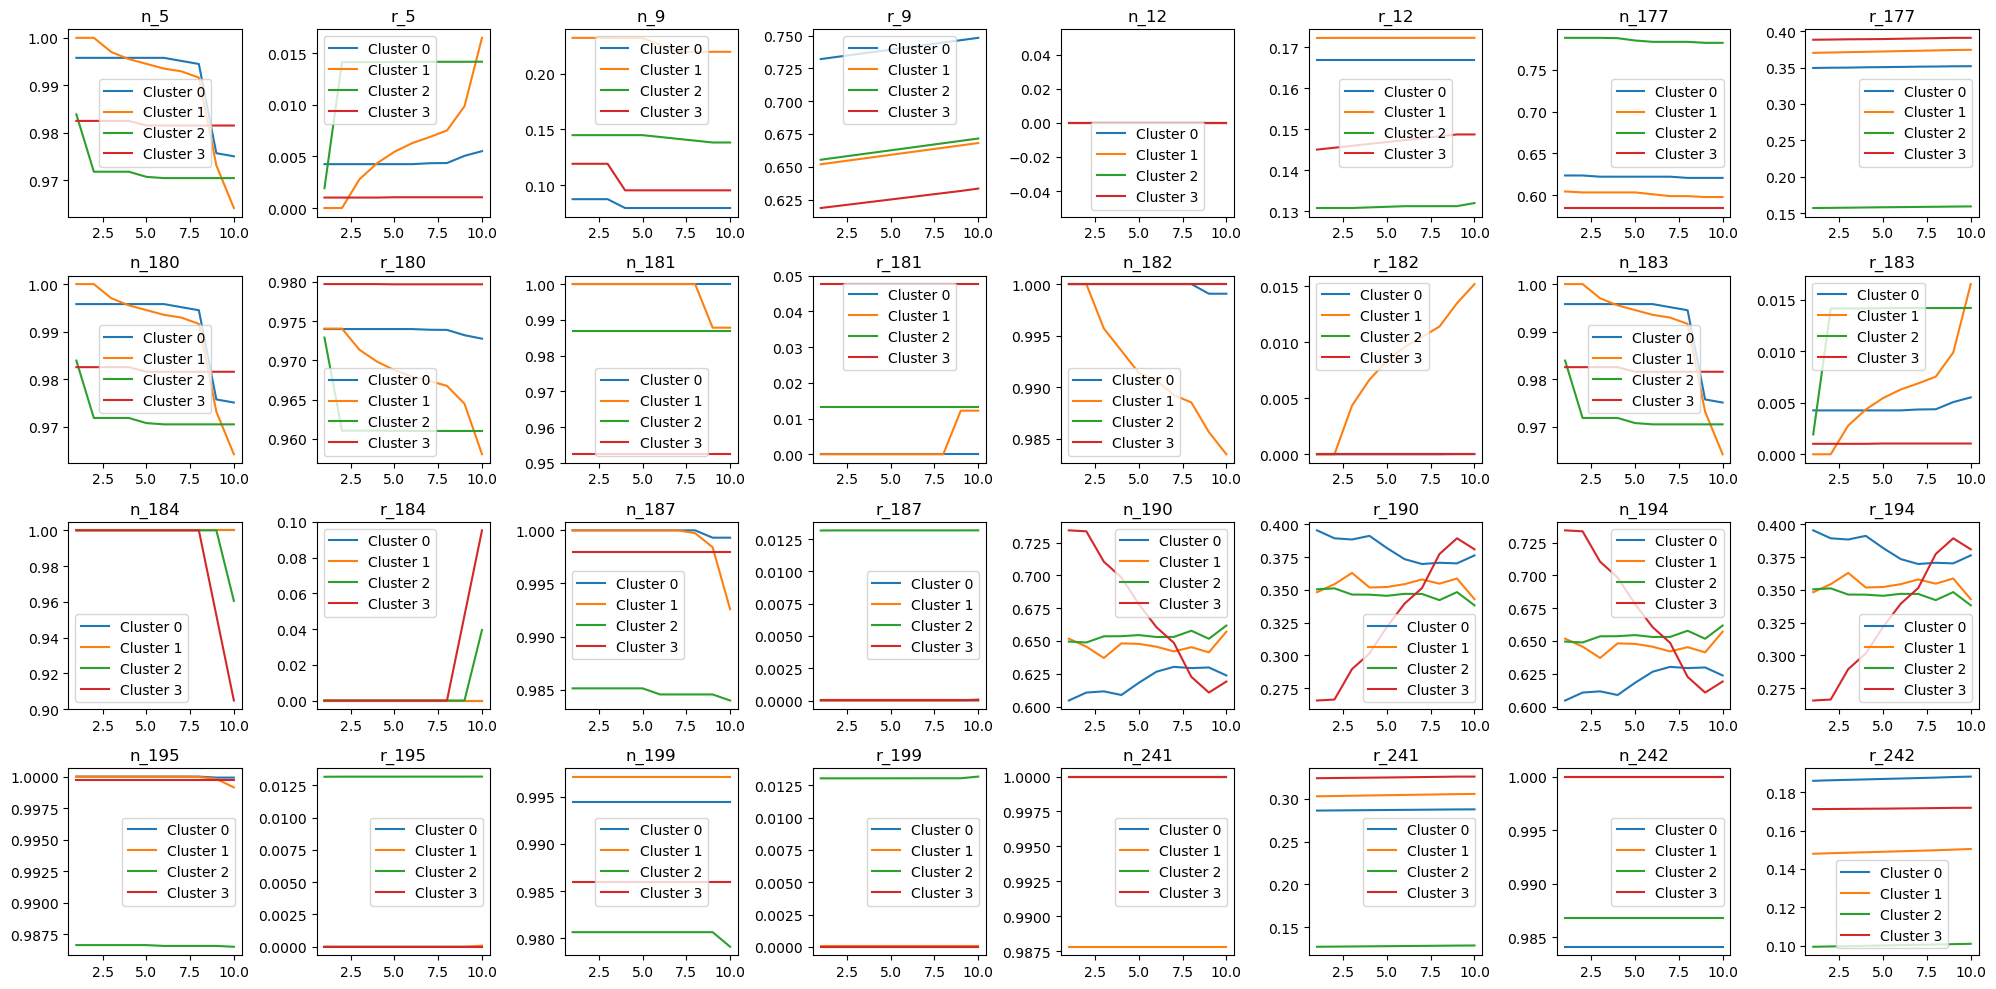

In [125]:
import matplotlib.pyplot as plt

# Assuming the dataframes are named 'cluster_0_mean_df', 'cluster_1_mean_df', 'cluster_2_mean_df', 'cluster_3_mean_df'
clusters = [cluster_0_mean_df, cluster_1_mean_df, cluster_2_mean_df, cluster_3_mean_df]
cluster_names = ['Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3']

# feature names list
feature_names = cluster_0_mean_df.columns.tolist()

# Create subplots with 4 rows and 8 columns, each cell will represent a feature
fig, axs = plt.subplots(nrows=4, ncols=8, figsize=(20, 10))

# Reshape the axes array to 1D for easy iteration
axs = axs.ravel()

for i in range(len(feature_names)):
    for j in range(4):
        # Plot each cluster's line in the same subplot (feature)
        axs[i].plot(clusters[j].index + 1, clusters[j].iloc[:, i], label=cluster_names[j])
        
    axs[i].set_title(feature_names[i])
    axs[i].legend()

plt.tight_layout()
plt.show()

In [ ]:
import matplotlib.pyplot as plt

def plot_cluster(df1,df2,df3,df4):

    # Get the number of clusters
    clusters = list(range(4))

    # Get the feature names
    feature_names = df1.columns # assuming the last column is 'cluster'

    # For each feature
    for feature in feature_names:
        # Create a new figure for this feature
        plt.figure(figsize=(10, 7))

        # For each cluster
        for cluster in clusters:
            # Select the data in the cluster
            cluster_data = df[df['cluster'] == cluster]

            # Compute the mean time series for this feature
            mean_time_series = cluster_data.groupby('building_number')[feature].mean()

            # Plot the mean time series for this feature
            plt.plot(mean_time_series, label=f'Cluster {cluster}')

        # Add a legend
        plt.legend()

        # Add a title
        plt.title(f'Feature: {feature}')

        # Show the plot
        plt.show()

In [4]:
#Scaling 과정
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(label_1)
label_1_scaled = scaler.transform(label_1)

c:\Users\choib\anaconda3\envs\iise-python\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\choib\anaconda3\envs\iise-python\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\choib\anaconda3\envs\iise-python\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\choib\anaconda3\envs\iise-python\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  war

Text(0.5, 1.0, 'K-Means Inertia')

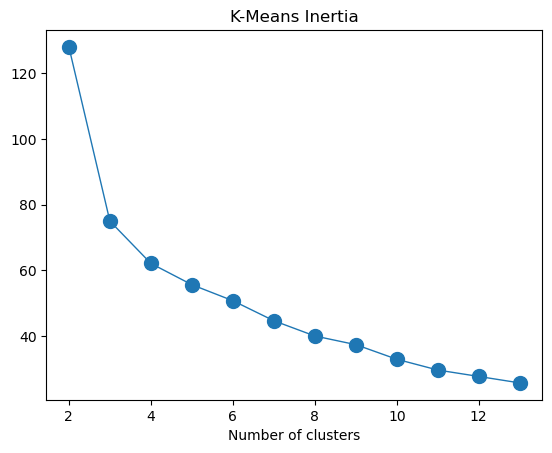

In [5]:
from sklearn.metrics import silhouette_score

from sklearn.cluster import KMeans
'''StandardSclaer를 사용하여 진행''' 

inertia=[]
kmeans_sil_scores=[]
for n_cluster in range(2,14):
    kmeans = KMeans(n_clusters=n_cluster, random_state=0)
    cluster_labels = kmeans.fit_predict(label_1_scaled)

    inertia.append(kmeans.inertia_)
    kmeans_sil_scores.append(silhouette_score(label_1_scaled, cluster_labels))

plt.plot(range(2,14),inertia,marker='o', lw=1,ms=10) 
plt.xlabel("Number of clusters")
plt.title("K-Means Inertia")
# clusters = 3일때, 꺽이는 지점인것을 알 수 있음

Text(0.5, 1.0, 'Silhouette Score')

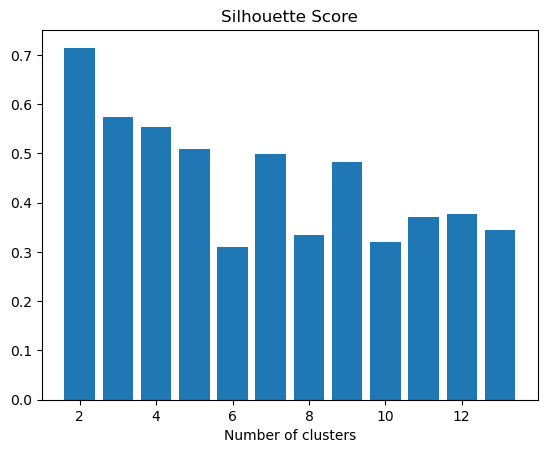

In [6]:
plt.bar(range(2,14),kmeans_sil_scores,)
plt.xlabel("Number of clusters")
plt.title("Silhouette Score")
# clusters =3 일때, silhouette score가 가장 높은것을 알 수 있음.

In [50]:
n_cluster=2
best_kmeans = KMeans(n_clusters=n_cluster,random_state=0)
cluster_labels=best_kmeans.fit_predict(label_1_scaled)
best_kmeans_sil_score=silhouette_score(label_1_scaled,cluster_labels)

print('Best kmeans clustering silhouette score:',best_kmeans_sil_score)

Best kmeans clustering silhouette score: 0.7144534943579282


c:\Users\choib\anaconda3\envs\iise-python\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [51]:
label_1['cluster']=cluster_labels
label_1

,r_1,n_5,r_5,r_9,r_12,n_171,r_171,n_172,r_172,n_173,...,r_194,r_195,n_196,r_196,r_197,r_198,r_199,n_175,r_175,cluster
476,4.294967e+09,98.0,2.0,40175.0,28.0,100.0,4.0,100.0,0.0,1.0,...,20.0,1.067805e+09,99.0,2.0,0.0,0.0,0.0,100.0,1.018337e+12,0
486,4.294967e+09,98.0,0.0,40012.0,59.0,100.0,0.0,100.0,0.0,1.0,...,16.0,2.260676e+09,100.0,0.0,0.0,0.0,0.0,100.0,1.005077e+12,0
1336,4.294967e+09,98.0,0.0,36922.0,30.0,100.0,0.0,100.0,0.0,1.0,...,18.0,1.591232e+09,100.0,0.0,0.0,0.0,0.0,100.0,9.407059e+11,0
1342,4.294967e+09,98.0,0.0,36522.0,28.0,100.0,0.0,100.0,0.0,83.0,...,14.0,2.791970e+08,100.0,0.0,0.0,0.0,0.0,100.0,9.280304e+11,0
1403,4.294967e+09,94.0,141.0,37481.0,30.0,99.0,70.0,100.0,0.0,1.0,...,8.0,2.748596e+09,97.0,141.0,0.0,0.0,0.0,100.0,9.497040e+11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64872,4.294967e+09,96.0,0.0,44625.0,36.0,100.0,0.0,100.0,0.0,97.0,...,15.0,1.270160e+06,100.0,0.0,0.0,0.0,0.0,1.0,1.134050e+12,0
65353,4.294967e+09,98.0,0.0,44244.0,27.0,100.0,0.0,100.0,0.0,1.0,...,19.0,2.581993e+09,100.0,0.0,0.0,0.0,0.0,100.0,1.125316e+12,0
65429,4.294967e+09,98.0,0.0,40585.0,28.0,100.0,0.0,100.0,0.0,1.0,...,15.0,1.579518e+09,100.0,0.0,0.0,0.0,0.0,100.0,1.035432e+12,0
65911,4.294967e+09,98.0,0.0,42078.0,44.0,100.0,0.0,100.0,0.0,1.0,...,17.0,3.873290e+09,100.0,0.0,0.0,0.0,0.0,100.0,1.057160e+12,0


In [52]:
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(label_1)
label_1_pca = pca.transform(label_1)

In [53]:
# dim reduction with tsne
tsne = TSNE(random_state=42)
# use fit_transform instead of fit, as TSNE has no transform method. not be used as preprocessing step of supervised learning
label_1_tsne = tsne.fit_transform(label_1)

Text(0, 0.5, 'Second principal component')

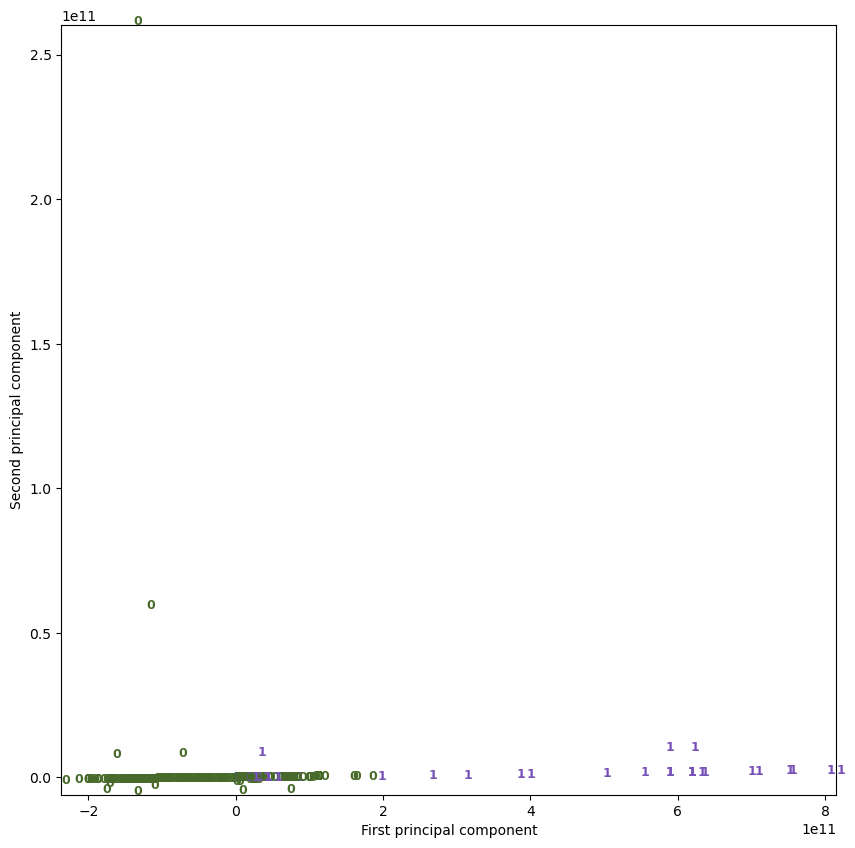

In [54]:
colors = ["#476A2A", "#7851B8", "#BD3430", "#4A2D4E", "#875525",
          "#A83683", "#4E655E", "#853541", "#3A3120", "#535D8E"]
plt.figure(figsize=(10, 10))
plt.xlim(label_1_pca[:, 0].min(), label_1_pca[:, 0].max())
plt.ylim(label_1_pca[:, 1].min(), label_1_pca[:, 1].max())
for i in range(len(label_1)):
    # actually plot the digits as text instead of using scatter
    plt.text(label_1_pca[i, 0], label_1_pca[i, 1], str(list(label_1['cluster'])[i]),
             color = colors[list(label_1['cluster'])[i]],
             fontdict={'weight': 'bold', 'size': 9})
plt.xlabel("First principal component")
plt.ylabel("Second principal component")
#중복되는 경우 많음. 난잡하게 섞여있다.

Text(0, 0.5, 'Second principal component')

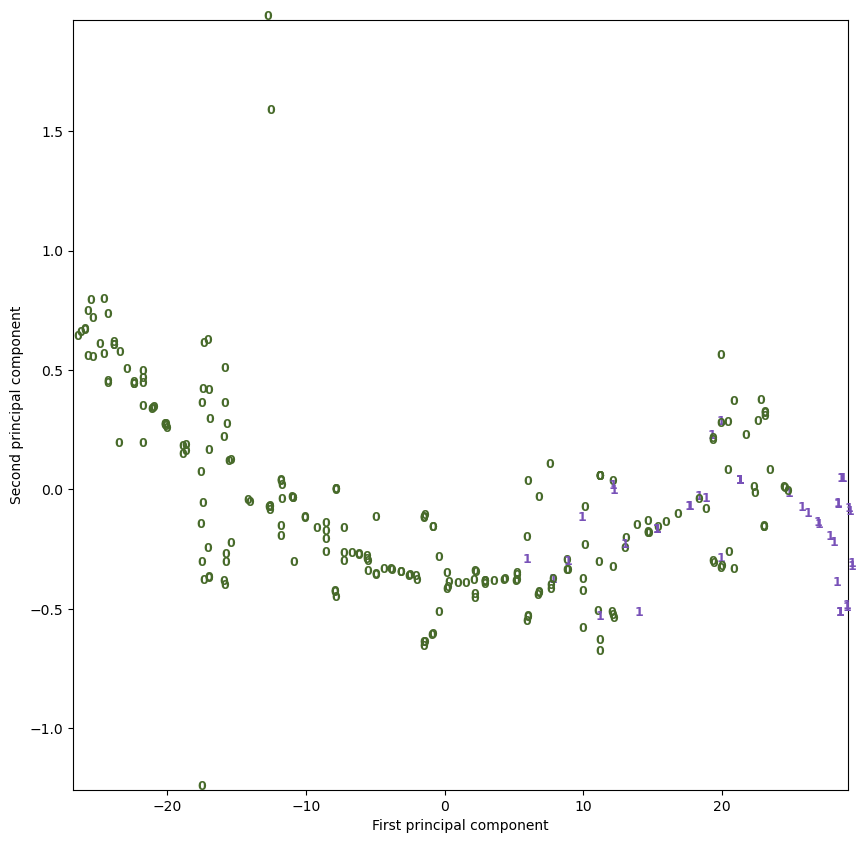

In [55]:
colors = ["#476A2A", "#7851B8", "#BD3430", "#4A2D4E", "#875525",
          "#A83683", "#4E655E", "#853541", "#3A3120", "#535D8E"]
plt.figure(figsize=(10, 10))
plt.xlim(label_1_tsne[:, 0].min(), label_1_tsne[:, 0].max())
plt.ylim(label_1_tsne[:, 1].min(), label_1_tsne[:, 1].max())
for i in range(len(label_1)):
    # actually plot the digits as text instead of using scatter
    plt.text(label_1_tsne[i, 0], label_1_tsne[i, 1], str(list(label_1['cluster'])[i]),
             color = colors[list(label_1['cluster'])[i]],
             fontdict={'weight': 'bold', 'size': 9})
plt.xlabel("First principal component")
plt.ylabel("Second principal component")
#상대적으로 잘 뭉쳐져있다! -> 시각화하는데 잘 사용됨.

## Clustering Algorithm(2)- Agglomerative Clustering

In [13]:
from sklearn.cluster import AgglomerativeClustering

agg_sil_scores=[]
#ward,complete,average,single -> 선택
linkages = ['ward','complete','average','single']
for linkage in linkages:
    linkage_sil_scores =[]
    for n_cluster in range(2,14):
        agg = AgglomerativeClustering(n_clusters=n_cluster,linkage=linkage)
        agg.fit(label_1_scaled)
        cluster_labels=agg.labels_
        linkage_sil_scores.append(silhouette_score(label_1_scaled,cluster_labels))
    agg_sil_scores.append(linkage_sil_scores)


In [14]:
agg_sil_scores=np.stack(agg_sil_scores)
for i in range(4):
    print('{}의 최대 silhouette score :{}'.format(linkages[i],agg_sil_scores[i].max()))
#ward의 silhouette score가 가장 높음 -> ward를 선택

ward의 최대 silhouette score :0.7144534943579282
complete의 최대 silhouette score :0.7144534943579282
average의 최대 silhouette score :0.7144534943579282
single의 최대 silhouette score :0.7144534943579282


Text(0.5, 1.0, 'Silhouette Score')

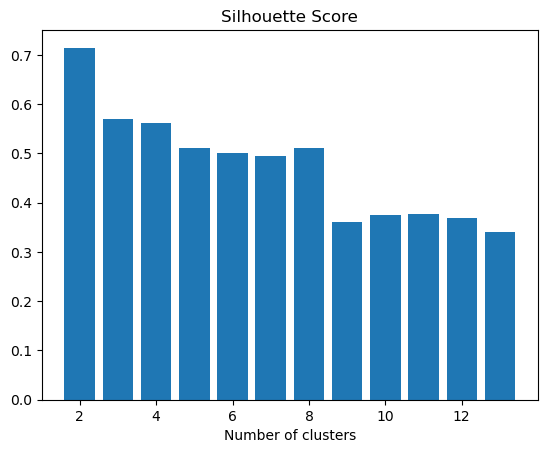

In [15]:
plt.bar(range(2,14),agg_sil_scores[0],)
plt.xlabel("Number of clusters")
plt.title("Silhouette Score")

In [41]:
n_cluster = 2
linkage='ward'
best_agg = AgglomerativeClustering(n_clusters=n_cluster,linkage=linkage)
best_agg.fit(label_1_scaled)
best_agg_sil_score=silhouette_score(label_1_scaled,best_agg.labels_)
print('Best agglomerative clustering silhouette score:',best_agg_sil_score)

Best agglomerative clustering silhouette score: 0.7144534943579282


In [42]:
cluster_labels=best_agg.fit_predict(label_1_scaled)

In [43]:
label_1['cluster']=cluster_labels
label_1

,r_1,n_5,r_5,r_9,r_12,n_171,r_171,n_172,r_172,n_173,...,r_194,r_195,n_196,r_196,r_197,r_198,r_199,n_175,r_175,cluster
476,4.294967e+09,98.0,2.0,40175.0,28.0,100.0,4.0,100.0,0.0,1.0,...,20.0,1.067805e+09,99.0,2.0,0.0,0.0,0.0,100.0,1.018337e+12,0
486,4.294967e+09,98.0,0.0,40012.0,59.0,100.0,0.0,100.0,0.0,1.0,...,16.0,2.260676e+09,100.0,0.0,0.0,0.0,0.0,100.0,1.005077e+12,0
1336,4.294967e+09,98.0,0.0,36922.0,30.0,100.0,0.0,100.0,0.0,1.0,...,18.0,1.591232e+09,100.0,0.0,0.0,0.0,0.0,100.0,9.407059e+11,0
1342,4.294967e+09,98.0,0.0,36522.0,28.0,100.0,0.0,100.0,0.0,83.0,...,14.0,2.791970e+08,100.0,0.0,0.0,0.0,0.0,100.0,9.280304e+11,0
1403,4.294967e+09,94.0,141.0,37481.0,30.0,99.0,70.0,100.0,0.0,1.0,...,8.0,2.748596e+09,97.0,141.0,0.0,0.0,0.0,100.0,9.497040e+11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64872,4.294967e+09,96.0,0.0,44625.0,36.0,100.0,0.0,100.0,0.0,97.0,...,15.0,1.270160e+06,100.0,0.0,0.0,0.0,0.0,1.0,1.134050e+12,0
65353,4.294967e+09,98.0,0.0,44244.0,27.0,100.0,0.0,100.0,0.0,1.0,...,19.0,2.581993e+09,100.0,0.0,0.0,0.0,0.0,100.0,1.125316e+12,0
65429,4.294967e+09,98.0,0.0,40585.0,28.0,100.0,0.0,100.0,0.0,1.0,...,15.0,1.579518e+09,100.0,0.0,0.0,0.0,0.0,100.0,1.035432e+12,0
65911,4.294967e+09,98.0,0.0,42078.0,44.0,100.0,0.0,100.0,0.0,1.0,...,17.0,3.873290e+09,100.0,0.0,0.0,0.0,0.0,100.0,1.057160e+12,0


In [44]:
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(label_1)
label_1_pca = pca.transform(label_1)

In [45]:
# dim reduction with tsne
tsne = TSNE(random_state=42)
# use fit_transform instead of fit, as TSNE has no transform method. not be used as preprocessing step of supervised learning
label_1_tsne = tsne.fit_transform(label_1)

Text(0, 0.5, 'Second principal component')

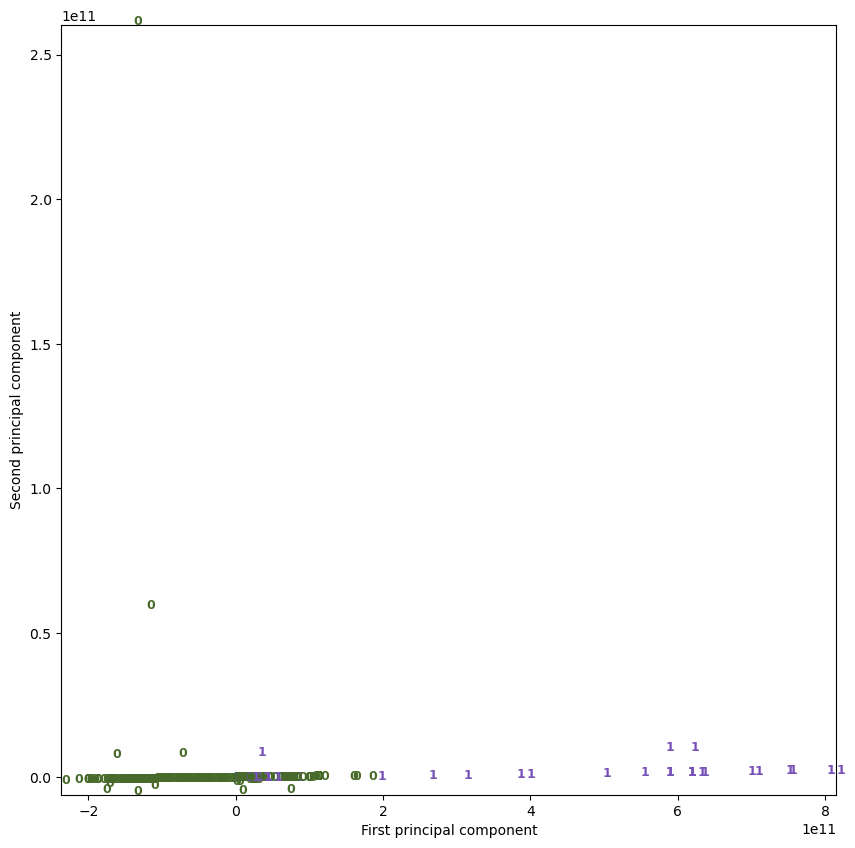

In [46]:
colors = ["#476A2A", "#7851B8", "#BD3430", "#4A2D4E", "#875525",
          "#A83683", "#4E655E", "#853541", "#3A3120", "#535D8E"]
plt.figure(figsize=(10, 10))
plt.xlim(label_1_pca[:, 0].min(), label_1_pca[:, 0].max())
plt.ylim(label_1_pca[:, 1].min(), label_1_pca[:, 1].max())
for i in range(len(label_1)):
    # actually plot the digits as text instead of using scatter
    plt.text(label_1_pca[i, 0], label_1_pca[i, 1], str(list(label_1['cluster'])[i]),
             color = colors[list(label_1['cluster'])[i]],
             fontdict={'weight': 'bold', 'size': 9})
plt.xlabel("First principal component")
plt.ylabel("Second principal component")
#중복되는 경우 많음. 난잡하게 섞여있다.

Text(0, 0.5, 'Second principal component')

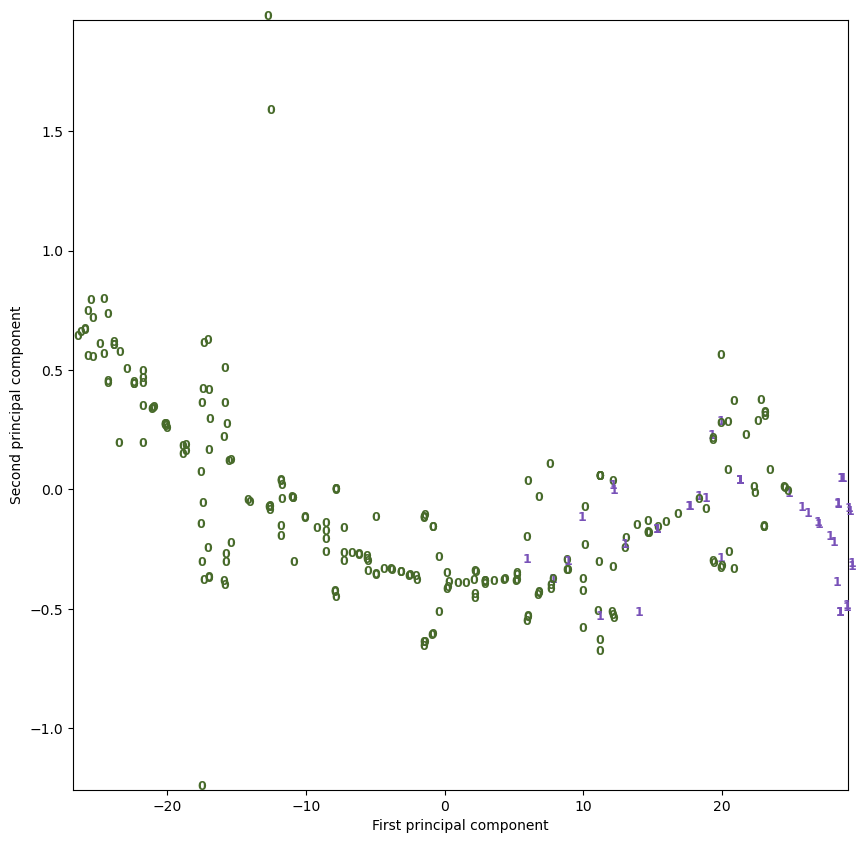

In [47]:
colors = ["#476A2A", "#7851B8", "#BD3430", "#4A2D4E", "#875525",
          "#A83683", "#4E655E", "#853541", "#3A3120", "#535D8E"]
plt.figure(figsize=(10, 10))
plt.xlim(label_1_tsne[:, 0].min(), label_1_tsne[:, 0].max())
plt.ylim(label_1_tsne[:, 1].min(), label_1_tsne[:, 1].max())
for i in range(len(label_1)):
    # actually plot the digits as text instead of using scatter
    plt.text(label_1_tsne[i, 0], label_1_tsne[i, 1], str(list(label_1['cluster'])[i]),
             color = colors[list(label_1['cluster'])[i]],
             fontdict={'weight': 'bold', 'size': 9})
plt.xlabel("First principal component")
plt.ylabel("Second principal component")
#상대적으로 잘 뭉쳐져있다! -> 시각화하는데 잘 사용됨.

## Clustering Algorithm(3) - DBSCAN

In [23]:
from sklearn.cluster import DBSCAN

eps_list=[1,1.5,1.8,2,2.5]
min_samples=[2,3,4,5,6,7]

dbscan_sil_scores =[]

for eps in eps_list:
    dbscan_sil=[]
    for ms in min_samples:
        dbscan = DBSCAN(eps=eps,min_samples=ms)
        dbscan.fit(label_1_scaled)
        cluster_labels = dbscan.labels_
        dbscan_sil.append(silhouette_score(label_1_scaled,cluster_labels))
    dbscan_sil_scores.append(dbscan_sil)

dbscan_sil_scores=np.stack(dbscan_sil_scores)
dbscan_sil_scores

array([[0.55245542, 0.55245542, 0.56064012, 0.56064012, 0.56064012,
        0.56064012],
       [0.68014128, 0.68014128, 0.68014128, 0.68014128, 0.68014128,
        0.68014128],
       [0.68014128, 0.68014128, 0.68014128, 0.68014128, 0.68014128,
        0.68014128],
       [0.71445349, 0.71445349, 0.71445349, 0.71445349, 0.71445349,
        0.71445349],
       [0.71445349, 0.71445349, 0.71445349, 0.71445349, 0.71445349,
        0.71445349]])

In [24]:
max_scores=[]
for i in range(len(eps_list)):
    max_scores.append(dbscan_sil_scores[i].max())
max_index=max_scores.index(max(max_scores))

print('silhouette score의 최대:',max_scores[max_index])
print('silhouette score가 최대일때, eps:',eps_list[max_index])

silhouette score의 최대: 0.7144534943579282
silhouette score가 최대일때, eps: 2


In [37]:
best_dbscan=DBSCAN(eps=2,min_samples=3)
best_dbscan.fit(label_1_scaled)
best_dbscan_sil_score=silhouette_score(label_1_scaled,best_dbscan.labels_)
print('Best DBSCAN clustering silhouette score:',best_dbscan_sil_score)

Best DBSCAN clustering silhouette score: 0.7144534943579282


In [38]:
label_1['cluster']=best_dbscan.fit_predict(label_1_scaled)
label_1

,r_1,n_5,r_5,r_9,r_12,n_171,r_171,n_172,r_172,n_173,...,r_194,r_195,n_196,r_196,r_197,r_198,r_199,n_175,r_175,cluster
476,4.294967e+09,98.0,2.0,40175.0,28.0,100.0,4.0,100.0,0.0,1.0,...,20.0,1.067805e+09,99.0,2.0,0.0,0.0,0.0,100.0,1.018337e+12,0
486,4.294967e+09,98.0,0.0,40012.0,59.0,100.0,0.0,100.0,0.0,1.0,...,16.0,2.260676e+09,100.0,0.0,0.0,0.0,0.0,100.0,1.005077e+12,0
1336,4.294967e+09,98.0,0.0,36922.0,30.0,100.0,0.0,100.0,0.0,1.0,...,18.0,1.591232e+09,100.0,0.0,0.0,0.0,0.0,100.0,9.407059e+11,0
1342,4.294967e+09,98.0,0.0,36522.0,28.0,100.0,0.0,100.0,0.0,83.0,...,14.0,2.791970e+08,100.0,0.0,0.0,0.0,0.0,100.0,9.280304e+11,0
1403,4.294967e+09,94.0,141.0,37481.0,30.0,99.0,70.0,100.0,0.0,1.0,...,8.0,2.748596e+09,97.0,141.0,0.0,0.0,0.0,100.0,9.497040e+11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64872,4.294967e+09,96.0,0.0,44625.0,36.0,100.0,0.0,100.0,0.0,97.0,...,15.0,1.270160e+06,100.0,0.0,0.0,0.0,0.0,1.0,1.134050e+12,0
65353,4.294967e+09,98.0,0.0,44244.0,27.0,100.0,0.0,100.0,0.0,1.0,...,19.0,2.581993e+09,100.0,0.0,0.0,0.0,0.0,100.0,1.125316e+12,0
65429,4.294967e+09,98.0,0.0,40585.0,28.0,100.0,0.0,100.0,0.0,1.0,...,15.0,1.579518e+09,100.0,0.0,0.0,0.0,0.0,100.0,1.035432e+12,0
65911,4.294967e+09,98.0,0.0,42078.0,44.0,100.0,0.0,100.0,0.0,1.0,...,17.0,3.873290e+09,100.0,0.0,0.0,0.0,0.0,100.0,1.057160e+12,0


In [39]:
label_1['cluster'].value_counts()

0    229
1     46
Name: cluster, dtype: int64

<BarContainer object of 3 artists>

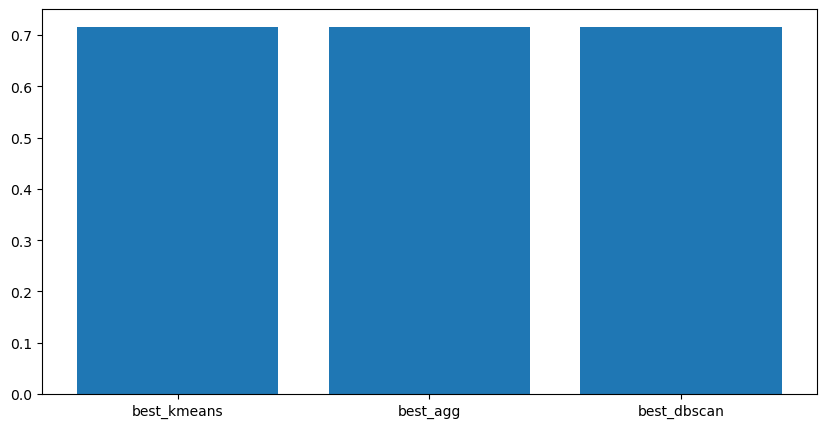

In [57]:
clusterings_sil_scores = [best_kmeans_sil_score,best_agg_sil_score,best_dbscan_sil_score]
cluster_names = ['best_kmeans','best_agg','best_dbscan']
plt.figure(figsize=(10,5))
plt.bar(cluster_names,clusterings_sil_scores,)

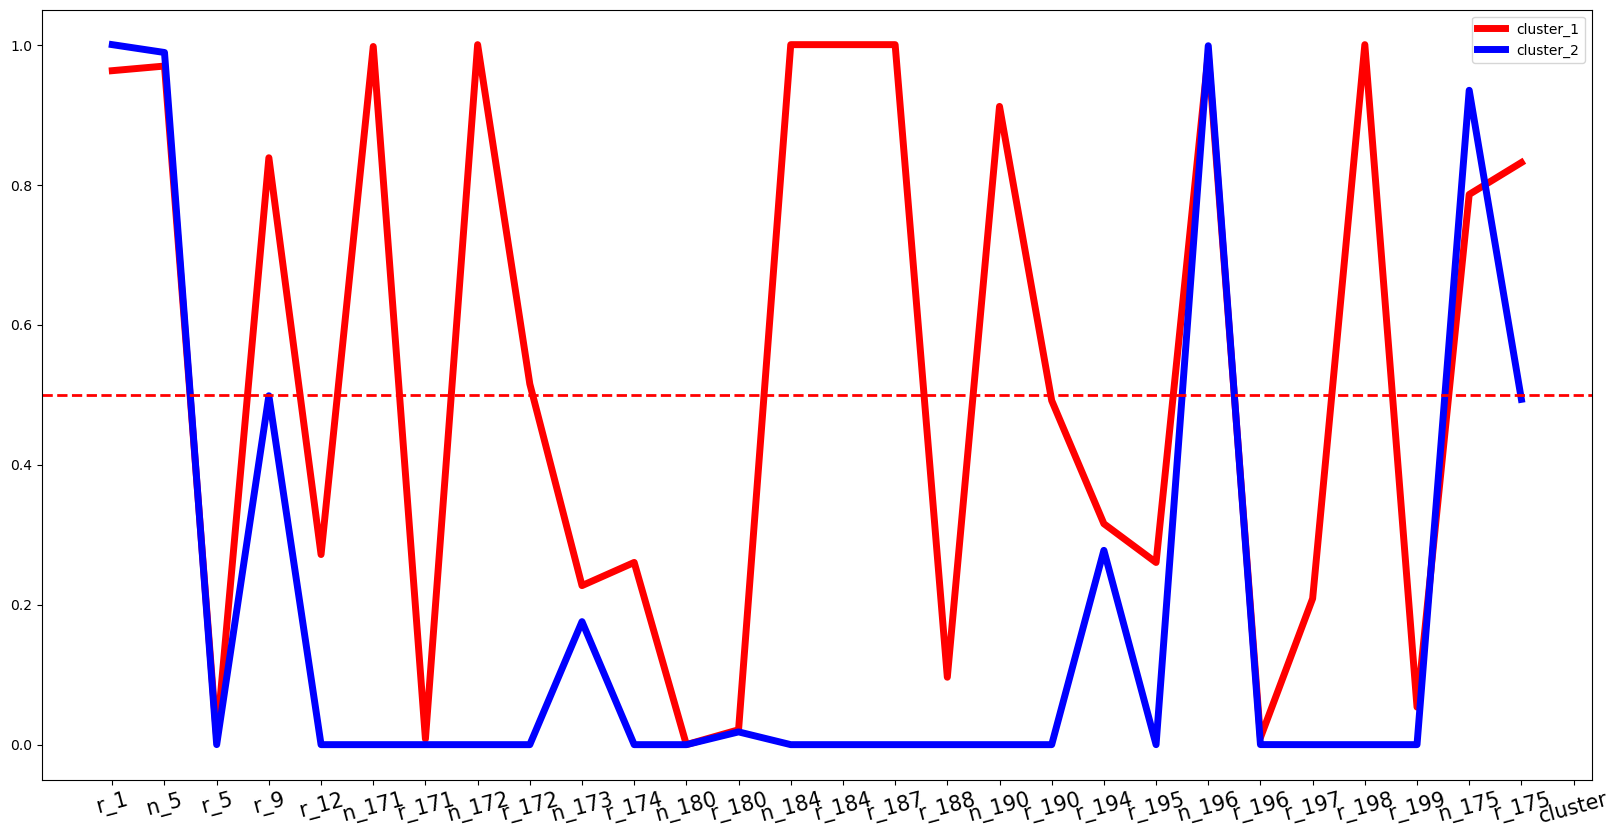

In [56]:
plt.figure(figsize=(20,10))

plt.plot(range(0,28),best_kmeans.cluster_centers_[0],linewidth=5, color='red', label='cluster_1')
plt.plot(range(0,28),best_kmeans.cluster_centers_[1], linewidth=5, color='blue', label='cluster_2')
plt.legend()
plt.axhline(0.5, color='red', linestyle='--', linewidth=2)
plt.xticks(np.arange(0,29),label_1.columns,rotation=15 ,fontsize=15)
plt.show()

In [31]:
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(label_1)
label_1_pca = pca.transform(label_1)

In [32]:
# dim reduction with tsne
tsne = TSNE(random_state=42)
# use fit_transform instead of fit, as TSNE has no transform method. not be used as preprocessing step of supervised learning
label_1_tsne = tsne.fit_transform(label_1)

Text(0, 0.5, 'Second principal component')

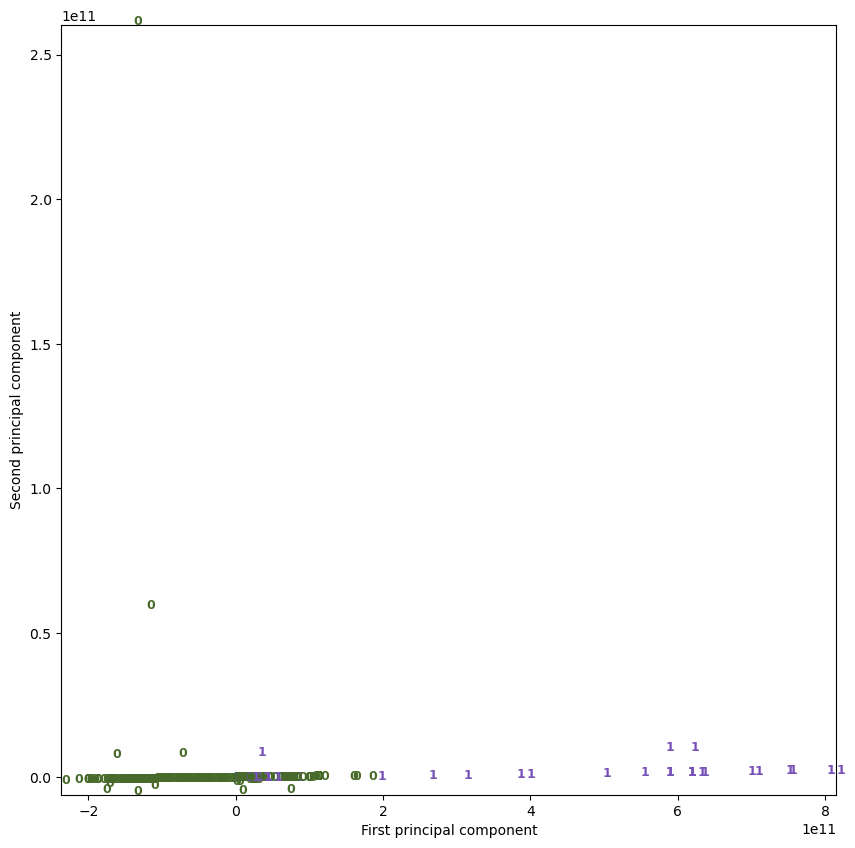

In [58]:
colors = ["#476A2A", "#7851B8", "#BD3430", "#4A2D4E", "#875525",
          "#A83683", "#4E655E", "#853541", "#3A3120", "#535D8E"]
plt.figure(figsize=(10, 10))
plt.xlim(label_1_pca[:, 0].min(), label_1_pca[:, 0].max())
plt.ylim(label_1_pca[:, 1].min(), label_1_pca[:, 1].max())
for i in range(len(label_1)):
    # actually plot the digits as text instead of using scatter
    plt.text(label_1_pca[i, 0], label_1_pca[i, 1], str(list(label_1['cluster'])[i]),
             color = colors[list(label_1['cluster'])[i]],
             fontdict={'weight': 'bold', 'size': 9})
plt.xlabel("First principal component")
plt.ylabel("Second principal component")
#중복되는 경우 많음. 난잡하게 섞여있다.

Text(0, 0.5, 'Second principal component')

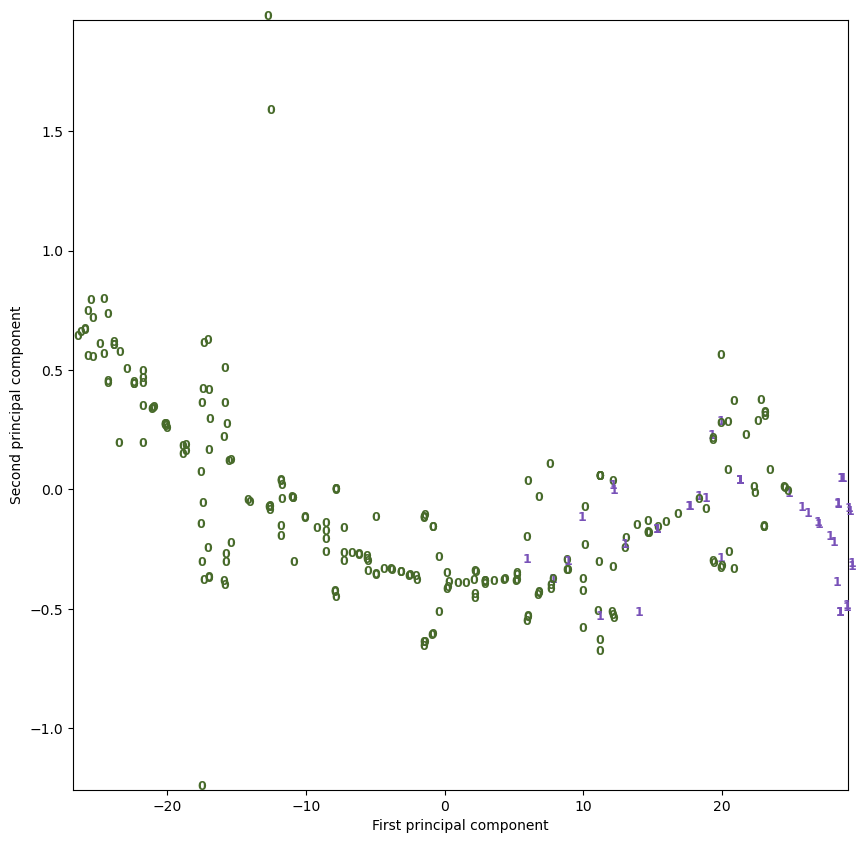

In [59]:
colors = ["#476A2A", "#7851B8", "#BD3430", "#4A2D4E", "#875525",
          "#A83683", "#4E655E", "#853541", "#3A3120", "#535D8E"]
plt.figure(figsize=(10, 10))
plt.xlim(label_1_tsne[:, 0].min(), label_1_tsne[:, 0].max())
plt.ylim(label_1_tsne[:, 1].min(), label_1_tsne[:, 1].max())
for i in range(len(label_1)):
    # actually plot the digits as text instead of using scatter
    plt.text(label_1_tsne[i, 0], label_1_tsne[i, 1], str(list(label_1['cluster'])[i]),
             color = colors[list(label_1['cluster'])[i]],
             fontdict={'weight': 'bold', 'size': 9})
plt.xlabel("First principal component")
plt.ylabel("Second principal component")
#상대적으로 잘 뭉쳐져있다! -> 시각화하는데 잘 사용됨.